<a href="https://colab.research.google.com/github/sanju492/first_project/blob/main/Unsupervised_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import  MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder

In [ ]:
adult_data = pd.read_csv("/content/adult_dataset.csv")
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [ ]:
adult_data.shape

(48842, 15)

In [ ]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [ ]:
adult_data.nunique()

,0
age,82
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [ ]:
adult_data.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [ ]:
cat_cols = adult_data.select_dtypes('object')
num_cols = adult_data.select_dtypes(('float64','int64'))

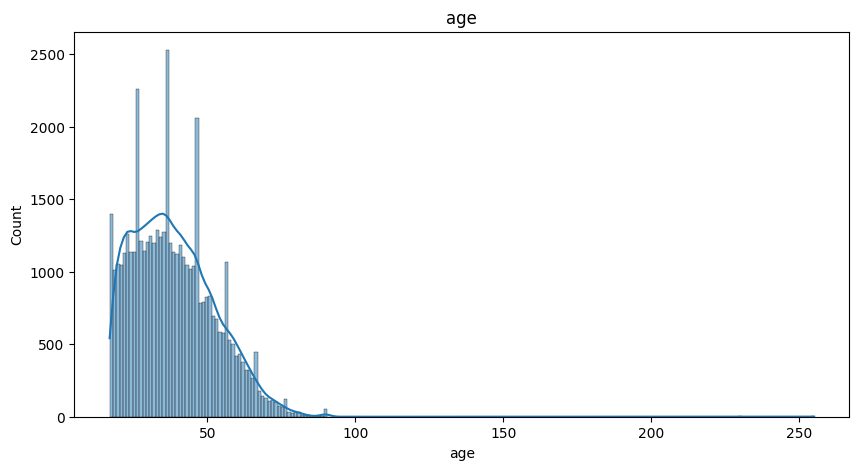

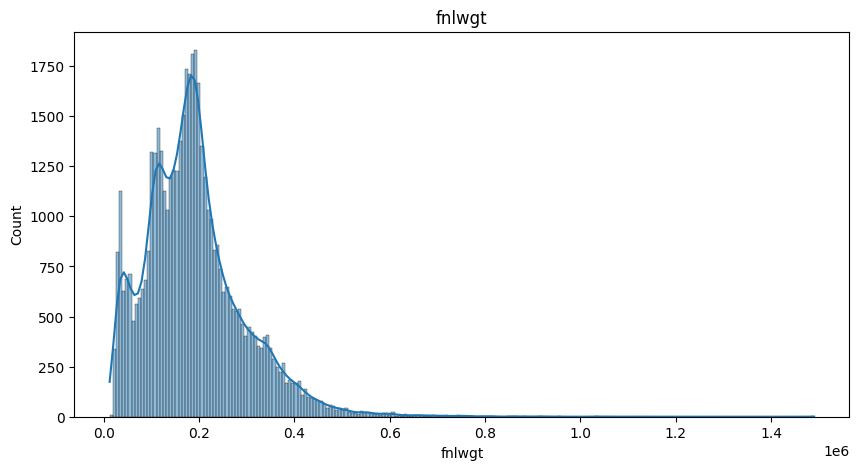

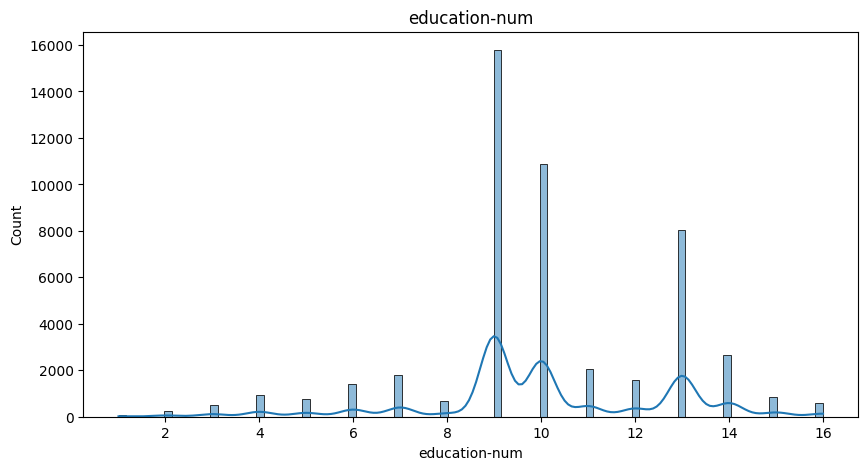

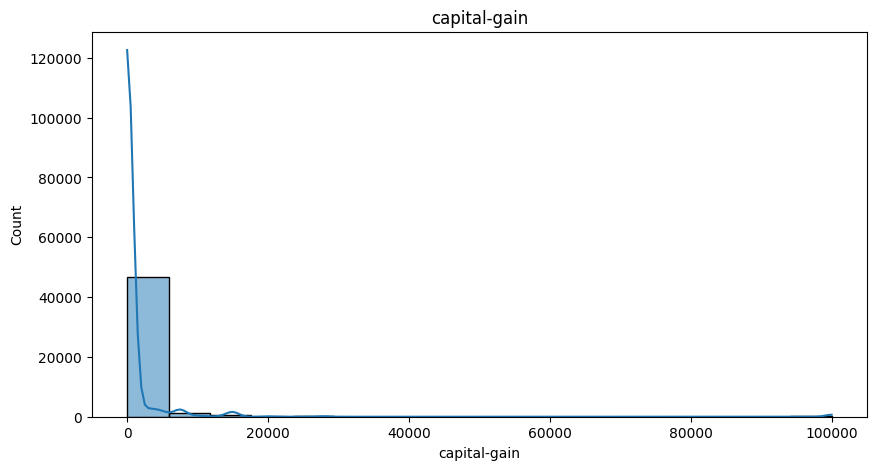

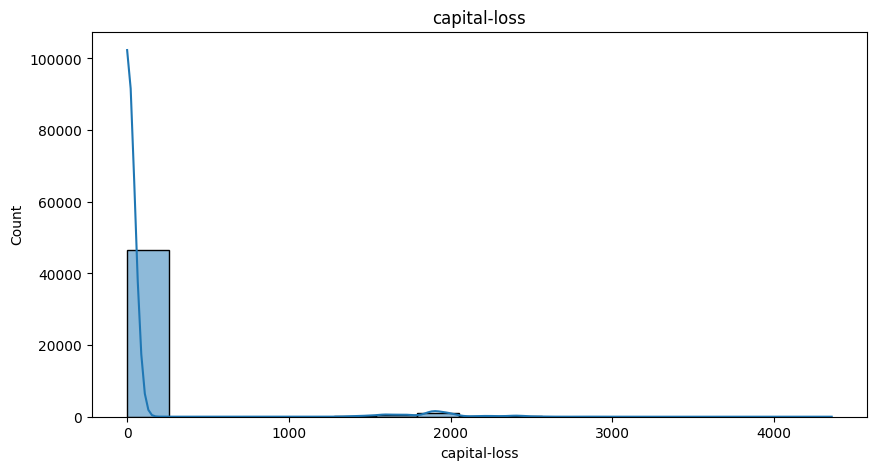

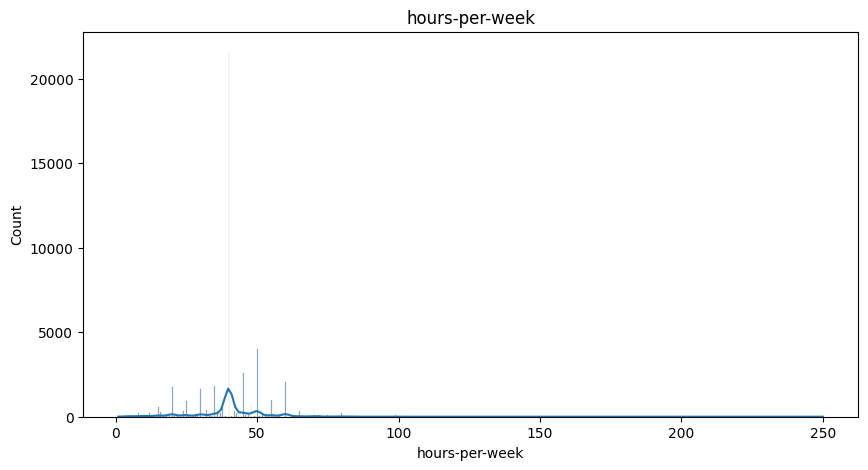

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(data=adult_data,x=i,kde=True)
  plt.title(i)

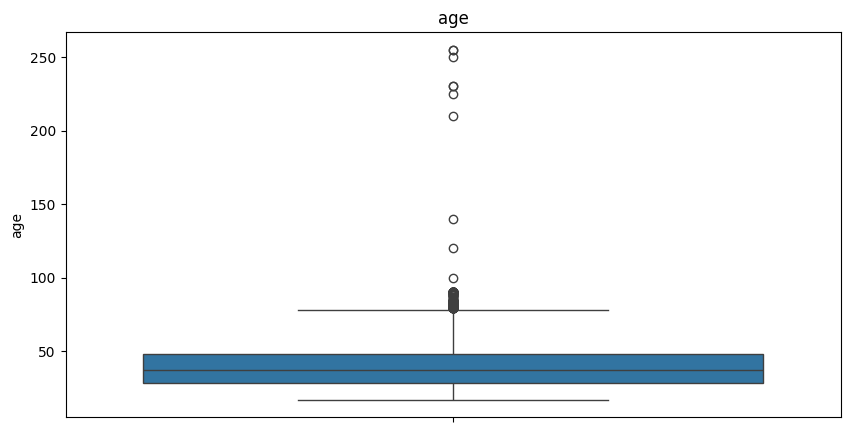

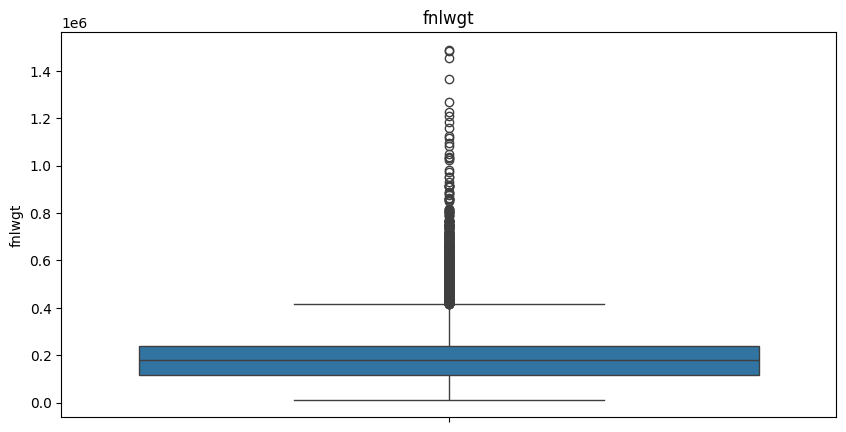

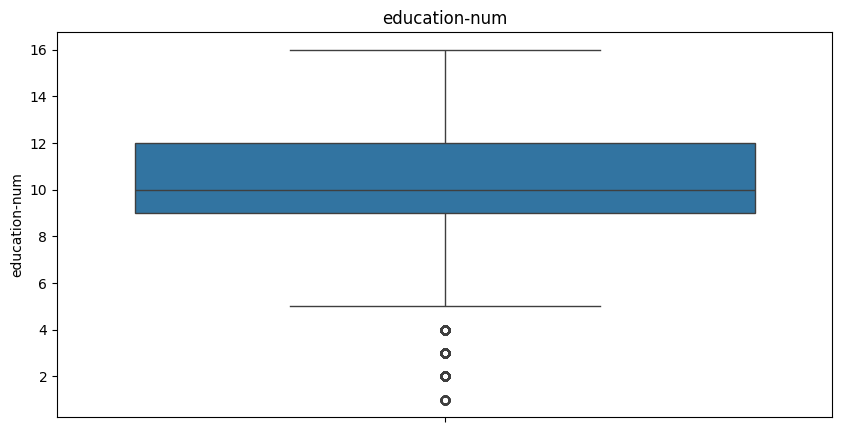

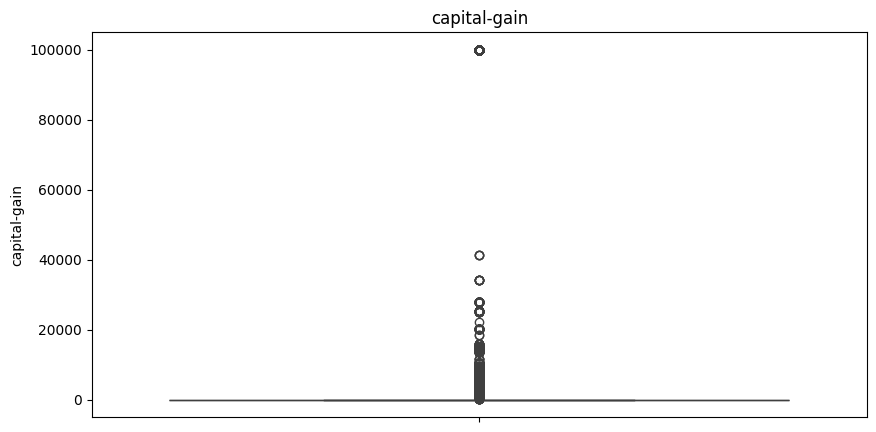

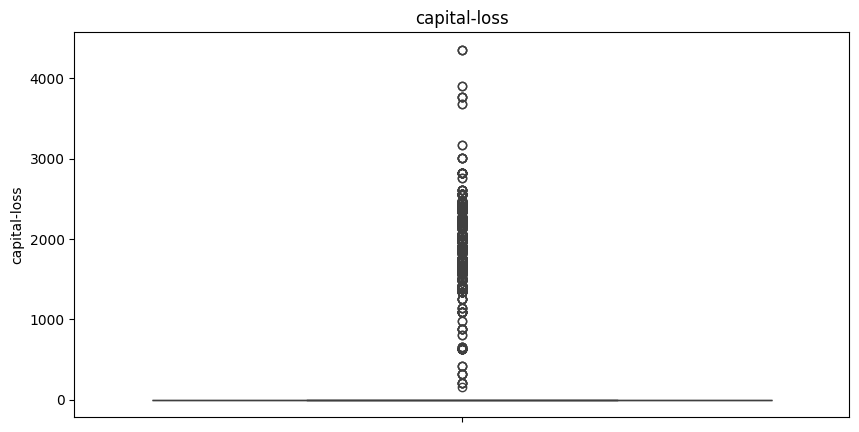

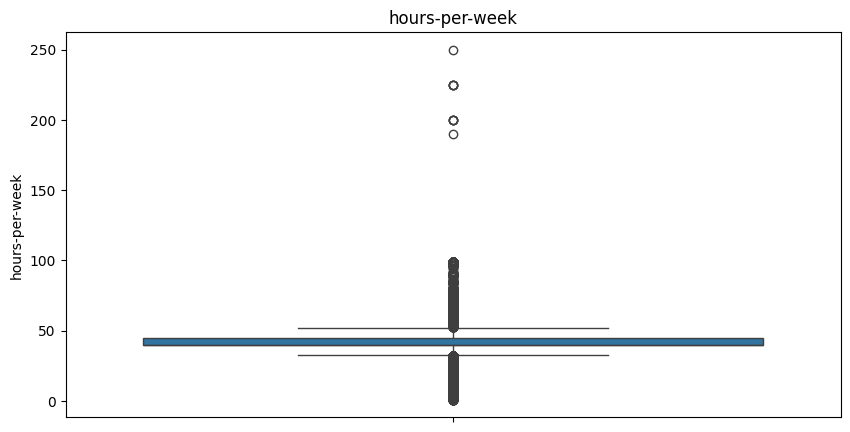

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(adult_data[i])
  plt.title(i)

In [ ]:
adult_data = adult_data.drop(['fnlwgt','capital-gain','capital-loss','education','income'],axis=1)

In [ ]:
adult_data[['native-country','workclass','occupation']] = adult_data[['native-country','workclass','occupation']].replace('?',np.nan)

In [ ]:
adult_data[['age','hours-per-week']] = adult_data[['age','hours-per-week']].fillna(adult_data[['age','hours-per-week']].median())

In [ ]:
adult_data['occupation'] = adult_data['occupation'].fillna(adult_data['occupation'].mode()[0])
adult_data['native-country'] = adult_data['native-country'].fillna(adult_data['native-country'].mode()[0])
adult_data['workclass'] = adult_data['workclass'].fillna(adult_data['workclass'].mode()[0])

In [ ]:
adult_data.isna().sum()

,0
age,0
workclass,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
hours-per-week,0
native-country,0


In [ ]:
adult_data['age'] = winsorize(adult_data['age'], limits=[0.00, 0.3487])
adult_data['hours-per-week'] = winsorize(adult_data['hours-per-week'], limits=[0.00, 0.40])

In [ ]:
# Select numeric columns
num_cols = adult_data.select_dtypes(include=['int64', 'float64'])

# Display skewness
print(num_cols.skew())


age              -0.689691
education-num    -0.316525
hours-per-week   -2.451439
dtype: float64


In [ ]:
robust_cols = ['age', 'hours-per-week']
scaler = RobustScaler()
adult_data[robust_cols] = scaler.fit_transform(adult_data[robust_cols])

In [ ]:

def frequency_encode_multiple(df, columns):
    df = df.copy()
    for col in columns:
        freq_map = df[col].value_counts(normalize=True).to_dict()
        df[col] = df[col].map(freq_map).fillna(0)
    return df

In [ ]:
cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
adult_encoded = frequency_encode_multiple(adult_data, cat_cols)

In [ ]:
adult_encoded

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.142857,0.038430,13,0.329982,0.109107,0.257627,0.855043,0.668482,0.0,0.918922
1,0.357143,0.074710,13,0.458192,0.118157,0.403669,0.855043,0.668482,-27.0,0.918922
2,0.071429,0.764608,9,0.135805,0.040477,0.257627,0.855043,0.668482,0.0,0.918922
3,0.357143,0.764608,7,0.458192,0.040477,0.403669,0.095922,0.668482,0.0,0.918922
4,-0.642857,0.764608,13,0.458192,0.224581,0.047725,0.095922,0.331518,0.0,0.002703
...,...,...,...,...,...,...,...,...,...,...
48837,0.142857,0.764608,13,0.135805,0.224581,0.257627,0.855043,0.331518,-4.0,0.918922
48838,0.357143,0.764608,9,0.031080,0.224581,0.030834,0.095922,0.668482,0.0,0.918922
48839,0.071429,0.764608,13,0.458192,0.224581,0.403669,0.855043,0.668482,0.0,0.918922
48840,0.357143,0.764608,13,0.135805,0.109107,0.155215,0.031100,0.668482,0.0,0.918922


In [ ]:
adult_encoded.shape

(48842, 10)

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(adult_encoded)
  wcss.append(kmeans.inertia_)

wcss

[3173576.808847393,
 807380.0875556954,
 554523.9486178117,
 381873.0735153309,
 278091.1082074407,
 243884.98562542722,
 179885.62249491323,
 158652.4457570473,
 147947.46086701116,
 139125.95978212243]

Text(0.5, 0, 'Number of clusters')

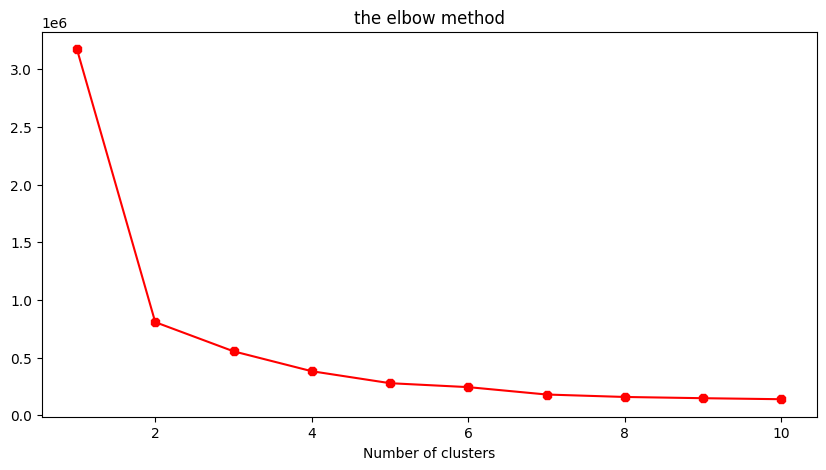

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.title('the elbow method')
plt.xlabel('Number of clusters')

In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2,random_state=42)
labels = kmeans.fit_predict(adult_encoded)

score = silhouette_score(adult_encoded,labels)
print('Silhouette Score:',score)

Silhouette Score: 0.7782098866693599


In [ ]:
adult_1=adult_data.copy()

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(adult_encoded)

adult_1['Cluster'] = kmeans.predict(adult_encoded)
adult_1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Cluster
0,0.142857,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,United-States,0
1,0.357143,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-27.0,United-States,1
2,0.071429,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,United-States,0
3,0.357143,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,United-States,0
4,-0.642857,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,Cuba,0


In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
adult_1['Cluster'].value_counts()

,count
Cluster,
0,43013
1,5829


<Axes: xlabel='workclass', ylabel='native-country'>

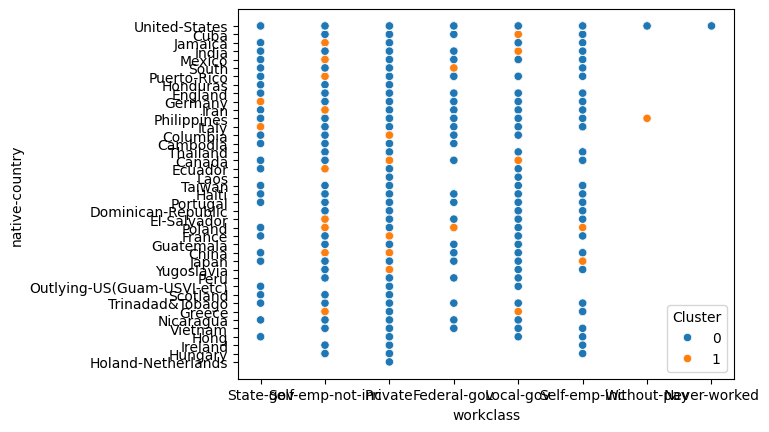

In [ ]:
sns.scatterplot(x='workclass',y='native-country',hue='Cluster',data=adult_1)

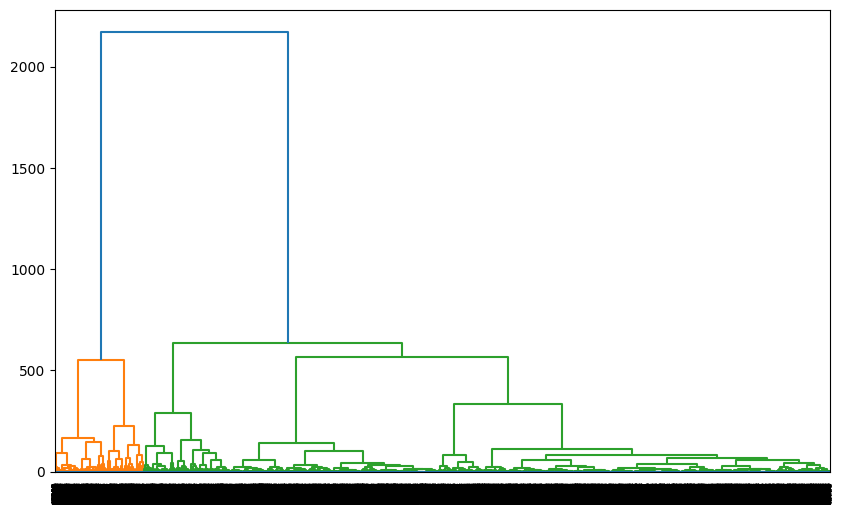

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
mergings = linkage(adult_encoded,method = 'ward')

plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(adult_encoded)
new_cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
score = silhouette_score(adult_encoded,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.7788752018031003


In [ ]:
adult_1['agle_cluster'] = new_cluster_labels
adult_1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Cluster,agle_cluster
0,0.142857,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,United-States,0,0
1,0.357143,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-27.0,United-States,1,1
2,0.071429,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,United-States,0,0
3,0.357143,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,United-States,0,0
4,-0.642857,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.142857,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,-4.0,United-States,0,0
48838,0.357143,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,United-States,0,0
48839,0.071429,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,United-States,0,0
48840,0.357143,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,United-States,0,0


In [ ]:
adult_1['agle_cluster'].value_counts()

,count
agle_cluster,
0,43222
1,5620
